In [4]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 15.4 MB 42.1 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [34]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt

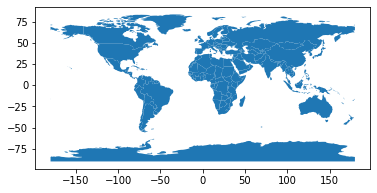

In [6]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world.plot()

In [7]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


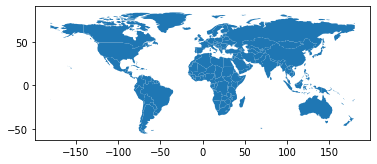

In [11]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.plot()

In [46]:
from google.colab import files
uploaded = files.upload()
import io
df_autonomie_corps = pd.read_csv(io.BytesIO(uploaded['df_autonomie_corps.csv']))
df_autonomie_corps.rename(columns={'Country Code': 'iso_a3'}, inplace=True)

df_carte=world.merge(df_autonomie_corps, on='iso_a3', how='left')

Saving df_autonomie_corps.csv to df_autonomie_corps (6).csv


In [47]:
df_carte

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap,Unnamed: 0,Country Name,indicateur autonomie corps
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791,166.0,Tanzania,0.673037
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991,3.0,Canada,0.868056
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823,25.0,United States,0.777827
...,...,...,...,...,...,...,...,...,...,...
171,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.014316,94.0,Serbia,0.763812
172,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.016512,NaN,NaN,NaN
173,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.009756,NaN,NaN,NaN
174,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.035766,47.0,Trinidad and Tobago,0.683810


In [51]:
# Je remplace les nans par des 0 pour que les pays apparaissent sur la carte
df_carte["indicateur autonomie corps"] = df_carte["indicateur autonomie corps"].fillna(0)

No handles with labels found to put in legend.


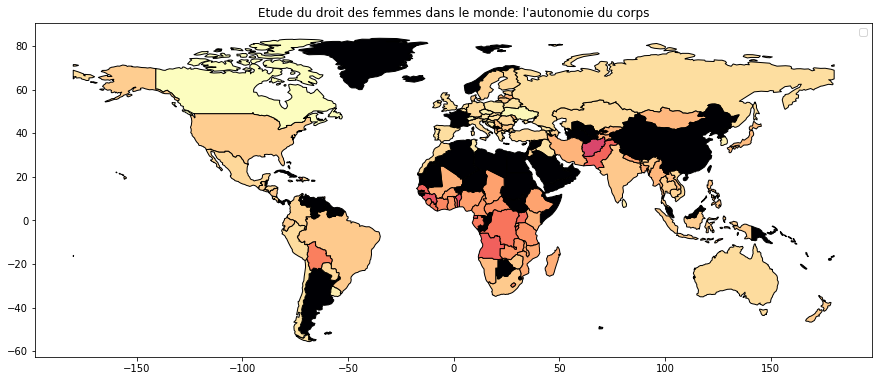

In [59]:
figure, ax = plt.subplots(1, 1, figsize=(15, 15))
df_carte.plot(ax=ax, column='indicateur autonomie corps', edgecolor='black', cmap='magma')
ax.set_title("Etude du droit des femmes dans le monde: l'autonomie du corps")
ax.legend()